# Steps on building your first beginner-friendly Algo Trading Bot using Python
Using a simple strategy called Simple Moving Average Crossover

### Step 1: Import Packages and Libraries 

In [ ]:
%pip install yfinance panadas numpy matplotlib

In [2]:
import yfinance as yf 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


### Step 2: Get the Stock Data

In [3]:
# we will use Apple () 
data = yf.download('AAPL', start='2022-01-01', end='2023-01-01')
data.head()

C:\Users\Anshul\AppData\Local\Temp\ipykernel_68916\604491070.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2022-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-01-03,178.645630,179.499559,174.425125,174.542902,104487900
2022-01-04,176.378326,179.558442,175.809046,179.254175,99310400
2022-01-05,171.686707,176.839663,171.411883,176.290017,94537600
2022-01-06,168.820663,172.059668,168.467317,169.507721,96904000
2022-01-07,168.987518,170.921105,167.868591,169.694211,86709100


### Step 3: Calculate Moving Averages

In [4]:
# Short-term and long-term moving average
data['SMA20'] = data['Close'].rolling(window=20).mean()
data['SMA50'] = data['Close'].rolling(window=50).mean()

### Step 4: Create Buy/Sell Signals

In [5]:
# Intialize Singal Column
data['Signal'] = 0

# Properly assign signals using iloc
signal_values = np.where(data['SMA20'][20:] > data['SMA50'][20:], 1, 0)
data.iloc[20:, data.columns.get_loc('Signal')] = signal_values

# Now safely crate Positin column based on Signal Changes
data['Position'] = data['Signal'].diff()


### Step 5: Plot the Strategy

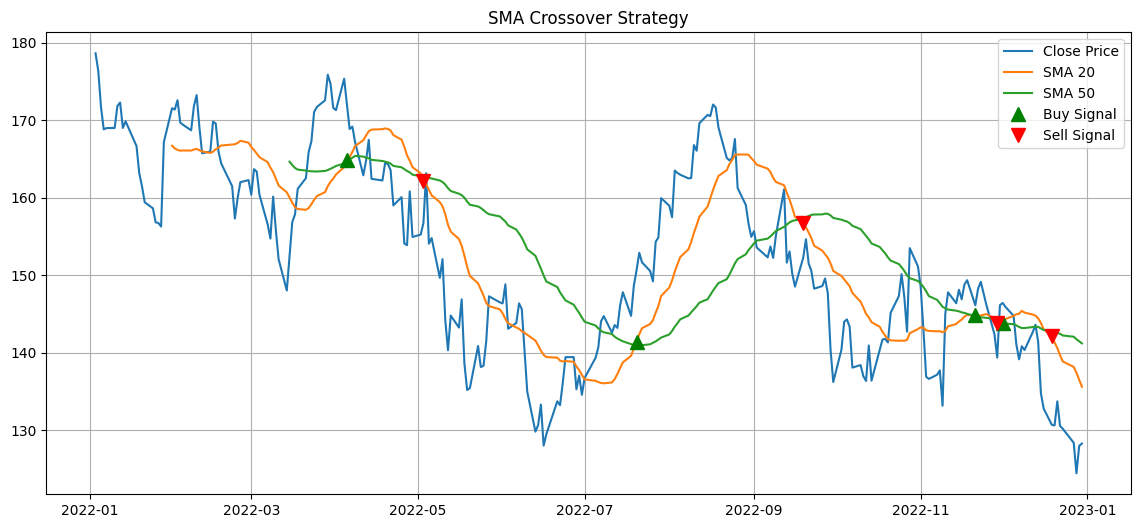

In [6]:
plt.figure(figsize=(14,6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA20'], label='SMA 20')
plt.plot(data['SMA50'], label='SMA 50')
plt.plot(data[data['Position'] == 1].index,
         data['SMA20'][data['Position'] == 1],
         '^', markersize=10, color='g', label='Buy Signal')
plt.plot(data[data['Position'] == -1].index,
         data['SMA20'][data['Position'] == -1], 
         'v', markersize=10, color='r', label='Sell Signal')
plt.title('SMA Crossover Strategy')
plt.legend()
plt.grid()
plt.show()       
